In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
sCr = 1.2
age = 40
V = 40
def CrCL(sCr, V, age, weight=70):
    CrCL = (140 - age)*weight /(72* sCr)
    return CrCL

CrCL(1.2, 40, 40)

81.01851851851853

The clearance of linezolid can be influenced by various factors,\
including body weight and renal function,\
often represented by serum creatinine levels.\
The formula to estimate the clearance of linezolid considering weight and \
serum creatinine can be more complex and may involve pharmacokinetic equations\ 
derived from clinical studies.\

One commonly used approach for drugs with renal clearance is to use the Cockcroft-Gault equation\
to estimate creatinine clearance (CrCl), which is then used to adjust the drug clearance. 
    

CL_linezolid = CL0 + (CrCL* F_renal)\
​
where:\
CL0 is the non0 renal clearance of linezolid\
CrCL is the creatinine clearance\
F_renal is the fraction of drug cleared renally

In [18]:
def LinezolidKel(CrCL, V):
    CL_linezolid = 5 + (CrCL * 0.4)
    Kel = CL_linezolid / V
    return Kel

Ke = LinezolidKel(81, 40)

In [28]:
#dosing linezolid is 600 mg every 12 hours
tau = 12
D = 600
time = np.linspace(0, 100, 100)
# Function to calculate concentration at any time t
def concentration(t, D, V, Ke, tau):
    conc = np.zeros_like(t)
    for i, time_point in enumerate(t):
        for n in range(int(time_point // tau) + 1):
            conc[i] += (D / V) * np.exp(-Ke * (time_point - n * tau))
    return conc

# Calculate concentration over time
Linezolid_conc = concentration(time, D, V, Ke, tau)
print(Linezolid_conc)
len(Linezolid_conc)
Linezolid_time = np.linspace(0, 100, 100)

[1.50000000e+01 5.83343346e+00 2.26859640e+00 8.82247075e-01
 3.43101974e-01 1.33430836e-01 5.18906600e-02 2.01800475e-02
 7.84793096e-03 3.05202554e-03 1.18691919e-03 4.61587609e-04
 1.33929744e+01 5.20846833e+00 2.02555023e+00 7.87727499e-01
 3.06343730e-01 1.19135718e-01 4.63313521e-02 1.80180573e-02
 7.00714256e-03 2.72504666e-03 1.05975856e-03 4.12135402e-04
 1.19579573e+01 4.65039654e+00 1.80851859e+00 7.03324855e-01
 2.73519916e-01 1.06370682e-01 4.13670864e-02 1.60874764e-02
 6.25634821e-03 2.43306606e-03 9.46208599e-04 3.67976327e-04
 1.06766979e+01 4.15212047e+00 1.61474123e+00 6.27965702e-01
 2.44213076e-01 9.49733819e-02 3.69347269e-02 1.43637514e-02
 5.58599922e-03 2.17237032e-03 8.44825180e-04 3.28548765e-04
 9.53272171e+00 3.70723319e+00 1.44172654e+00 5.60681056e-01
 2.18046376e-01 8.47972682e-02 3.29772815e-02 1.28247185e-02
 4.98747612e-03 1.93960734e-03 7.54304690e-04 2.93345748e-04
 8.51131911e+00 3.31001425e+00 1.28724986e+00 5.00605759e-01
 1.94683359e-01 7.571149

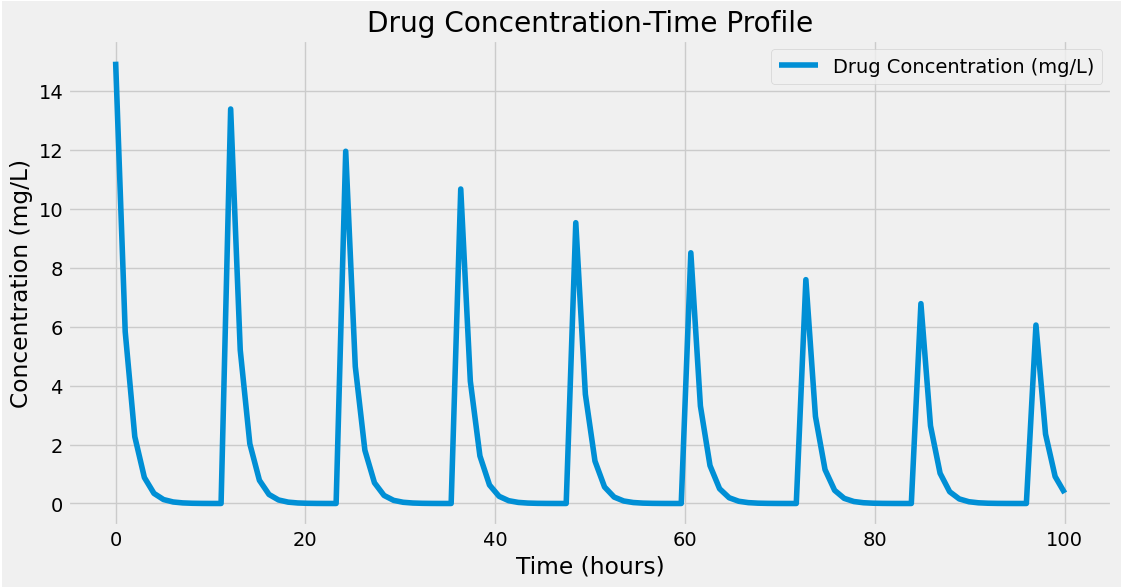

In [32]:
# Plot the concentration-time profile
#plt.rcParams['lines.linewidth'] = 1
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 6), linewidth = 0.75)
ax.plot(Linezolid_time, Linezolid_conc, label='Drug Concentration (mg/L)')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Concentration (mg/L)')
ax.set_title('Drug Concentration-Time Profile')
plt.legend()
plt.grid(True)
